<a href="https://colab.research.google.com/github/Saikrishna-Mateti/LoginPage/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Implement K-nearest neighbor classifier and provide the accuracy using iris dataset


In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# Load the Iris dataset
iris_data = datasets.load_iris()
X = iris_data.data
y = iris_data.target


In [ ]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create KNN classifier with K=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predict on test data
y_pred = knn.predict(X_test)


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the KNN classifier: {accuracy:.2f}')


Accuracy of the KNN classifier: 1.00


###  Implement any DL-based image classification algorithm except AlexNet and provide the accuracy using CIFAR-10 dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
#building CNN model Architecture with multiple layers

cnn_model = models.Sequential([
    # Convolutional layer with 32 filters of size 3x3, ReLU activation, and input shape for CIFAR-10
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    # Adding another convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Adding another convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Flattening the output to feed into a DNN
    layers.Flatten(),
    # Dense layer
    layers.Dense(64, activation='relu'),
    # Output layer with 10 classes
    layers.Dense(10, activation='softmax')
])


In [ ]:
#Compiling model
cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#Training the model

history = cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 15s 6ms/step - loss: 1.5198 - accuracy: 0.4401 - val_loss: 1.2824 - val_accuracy: 0.5436
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1797 - accuracy: 0.5834 - val_loss: 1.1232 - val_accuracy: 0.6050
Epoch 3/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.0310 - accuracy: 0.6366 - val_loss: 0.9954 - val_accuracy: 0.6546
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9322 - accuracy: 0.6727 - val_loss: 0.9364 - val_accuracy: 0.6747
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8579 - accuracy: 0.7011 - val_loss: 0.9640 - val_accuracy: 0.6684
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8029 - accuracy: 0.7182 - val_loss: 0.9193 - val_accuracy: 0.6851
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7527 - accuracy: 0.7351 - val_loss: 0.9301 - val_accuracy

In [ ]:
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.2f}')




313/313 - 2s - loss: 0.8732 - accuracy: 0.7058 - 2s/epoch - 5ms/step
Test accuracy: 0.71


## Implement any DL-based object detection pipeline using R-CNN

In [3]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image

import cv2
from google.colab.patches import cv2_imshow

In [7]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 137MB/s]


In [ ]:
model.eval()

In [1]:
!wget 'https://images.unsplash.com/photo-1520180183766-4a016dbaf8cd?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NTJ8fGxvdyUyMHJlc3xlbnwwfHwwfHx8MA%3D%3D'

--2024-04-21 16:12:30--  https://images.unsplash.com/photo-1520180183766-4a016dbaf8cd?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NTJ8fGxvdyUyMHJlc3xlbnwwfHwwfHx8MA%3D%3D
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21255 (21K) [image/jpeg]
Saving to: ‘photo-1520180183766-4a016dbaf8cd?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NTJ8fGxvdyUyMHJlc3xlbnwwfHwwfHx8MA==’

photo-1520180183766 100%[===================>]  20.76K  --.-KB/s    in 0s      

2024-04-21 16:12:30 (76.3 MB/s) - ‘photo-1520180183766-4a016dbaf8cd?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NTJ8fGxvdyUyMHJlc3xlbnwwfHwwfHx8MA==’ saved [21255/21255]



In [4]:
ig = Image.open("/content/photo-1520180183766-4a016dbaf8cd?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NTJ8fGxvdyUyMHJlc3xlbnwwfHwwfHx8MA==")

In [9]:
transfrom = T.ToTensor()
img = transfrom(ig)

In [10]:
with torch.no_grad():
  pred = model([img])

In [11]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [12]:
bboxes , labels , scores  = pred[0]["boxes"] , pred[0]["labels"], pred[0]["scores"]

In [13]:
num = torch.argwhere(scores > 0.9).shape[0]

In [14]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [15]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [16]:
igg = cv2.imread("/content/photo-1520180183766-4a016dbaf8cd?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NTJ8fGxvdyUyMHJlc3xlbnwwfHwwfHx8MA==")

for i in range(num):
  x1 , y1 , x2 , y2 = bboxes[i].numpy().astype("int")

  class_names = coco_names[labels.numpy()[i] - 1]

  igg = cv2.rectangle(igg , (x1 , y1) , (x2 , y2) , (0 , 255 , 0) , 1)
  igg = cv2.putText(igg , class_names , (x1 , y1 - 10) , font , 1 , (255 , 0, 0) , 1 , cv2.LINE_AA)

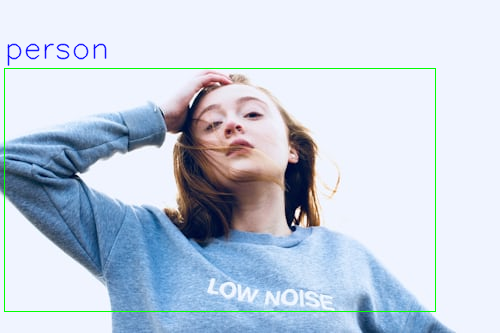

In [17]:
cv2_imshow(igg)

In [18]:
labels

tensor([ 1,  1, 65,  1,  1,  1])

In [19]:
pred

[{'boxes': tensor([[  4.3456,  68.7195, 435.9065, 311.8121],
          [ 84.2537,  69.8988, 349.1103, 261.1304],
          [  2.7507, 189.9171, 458.0482, 331.3185],
          [188.8824,  45.2274, 462.3839, 324.1476],
          [146.2057,  76.9454, 296.8934, 236.7635],
          [  6.7809, 108.6006, 246.4466, 326.6763]]),
  'labels': tensor([ 1,  1, 65,  1,  1,  1]),
  'scores': tensor([0.9914, 0.5481, 0.1174, 0.0706, 0.0657, 0.0644])}]

### **Implement vision transformer and compare the accuracy with results from Q2**

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, LayerNormalization, MultiHeadAttention, Add, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [11]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


170498071/170498071 [==============================] - 13s 0us/step


In [12]:
# Reshape data for ViT
patch_size = 4
X_train = tf.image.resize(X_train, (32//patch_size, 32//patch_size))
X_test = tf.image.resize(X_test, (32//patch_size, 32//patch_size))
X_train = tf.reshape(X_train, (-1, (32//patch_size) * (32//patch_size), 3))
X_test = tf.reshape(X_test, (-1, (32//patch_size) * (32//patch_size), 3))

In [13]:
# Vision Transformer Model
def vit_model(patch_size=4, num_classes=10, d_model=128, num_heads=4, mlp_dim=512, num_layers=6, dropout=0.1):
    inputs = Input(shape=((32//patch_size) * (32//patch_size), 3))
    x = inputs
    x = Dense(d_model)(x)
    x = Reshape((-1, d_model))(x)

    # Positional Encoding
    positions = tf.range(start=0, limit=(32//patch_size)*(32//patch_size), delta=1)
    positions = tf.one_hot(positions, ((32//patch_size)*(32//patch_size)))
    position_embedding = Dense(d_model)(positions)
    x += position_embedding

    # Transformer Encoder
    for _ in range(num_layers):
        # Multi-Head Self-Attention
        attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=d_model//num_heads)(x, x)
        attn_output = Dropout(dropout)(attn_output)
        attn_output = Add()([x, attn_output])
        x = LayerNormalization(epsilon=1e-6)(attn_output)

        # MLP
        mlp_output = Dense(mlp_dim, activation='relu')(x)
        mlp_output = Dense(d_model)(mlp_output)
        mlp_output = Dropout(dropout)(mlp_output)
        mlp_output = Add()([x, mlp_output])
        x = LayerNormalization(epsilon=1e-6)(mlp_output)

    # Classifier Head
    x = Flatten()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

In [14]:
# Create and compile the model
vit = vit_model()
vit.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
vit.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss, accuracy = vit.evaluate(X_test, y_test)
print("Test Accuracy (ViT):", accuracy)

Epoch 1/10
1563/1563 [==============================] - 77s 36ms/step - loss: 2.4417 - accuracy: 0.1006 - val_loss: 2.3193 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 2.2273 - accuracy: 0.1679 - val_loss: 2.3019 - val_accuracy: 0.1049
Epoch 3/10
1563/1563 [==============================] - 54s 35ms/step - loss: 2.3133 - accuracy: 0.1006 - val_loss: 2.3059 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 54s 35ms/step - loss: 2.3107 - accuracy: 0.1019 - val_loss: 2.3072 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 54s 34ms/step - loss: 2.3080 - accuracy: 0.0986 - val_loss: 2.3059 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 2.3062 - accuracy: 0.0997 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 54s 35ms/step - loss: 2.3056 - accuracy: 0.0980 - val_loss: 2.3082 -